#  第四讲 小世界网络【实践】一

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常
# 关注B站和公众号：单哥的科研日常，获取更多讲解教程

### 实验环境：
### Python版本==3.9.6, networkx==3.0, matplotlib==3.5.3, numpy==1.24.2

## 1、K-近邻规则网络的生成与可视化

In [2]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# 自己写一个规则网络的生成算法
def regular_graph(n, k):
    G = nx.Graph()
    nodes = list(range(n))  # 节点标签设置为0到n-1
    # 每个节点与周围k/2个邻近节点相连
    for j in range(1, k // 2 + 1):   # //是取整除 - 返回商的整数部分（向下取整）
        targets = nodes[j:] + nodes[0:j] 
        G.add_edges_from(zip(nodes, targets))
    return G

In [4]:
# zip函数的作用
a = [1,2,3,4]
b = [6,7,8,9]
list(zip(a,b))

[(1, 6), (2, 7), (3, 8), (4, 9)]

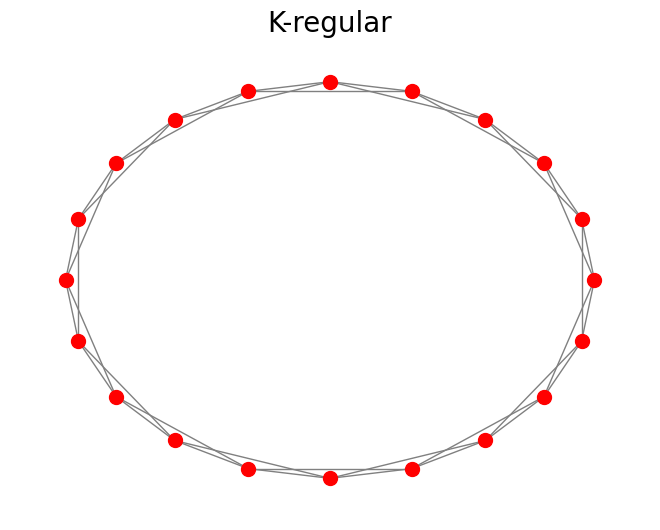

In [5]:
n = 20 # 网络节点总数
k = 4 # 近邻节点数
color_list = ['red','gray']

G = regular_graph(n, k)
pos = nx.circular_layout(G)
nx.draw(G, pos, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("K-regular", fontsize=20)
plt.savefig("K-regular.png", dpi=600)

## 2、WS小世界网络的生成与可视化

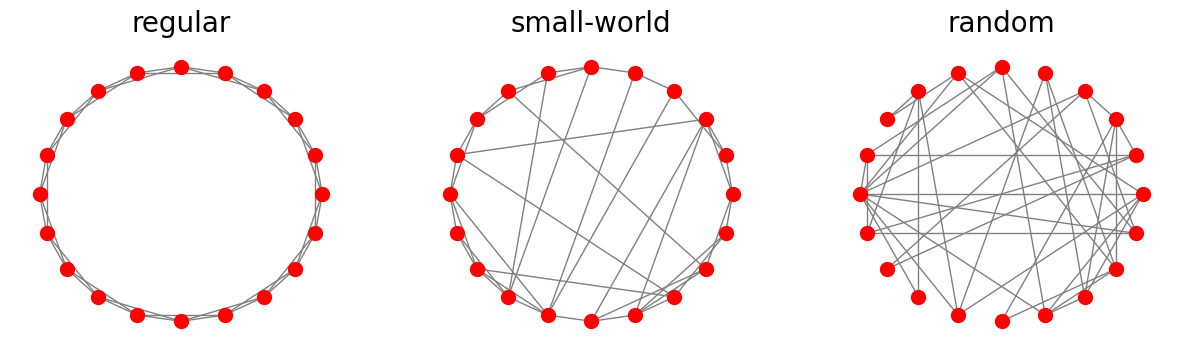

In [6]:
plt.figure(figsize=(15, 4))
# 绘制规则网络
p = 0
G1 = nx.watts_strogatz_graph(n, k, p)
plt.subplot(131)
pos1 = nx.circular_layout(G1)
nx.draw(G1, pos1, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("regular", fontsize=20)

# 绘制WS小世界
p=0.2
G2 = nx.watts_strogatz_graph(n, k, p)
plt.subplot(132)
pos2 = nx.circular_layout(G2)
nx.draw(G2, pos2, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("small-world", fontsize=20)


#绘制随机网络
p=1.0
G3 = nx.watts_strogatz_graph(n, k, p)
plt.subplot(133)
pos3 = nx.circular_layout(G3)
nx.draw(G3, pos3, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("random", fontsize=20)
plt.savefig("WS.png", dpi=600)

## 3、NW小世界网络的生成与可视化

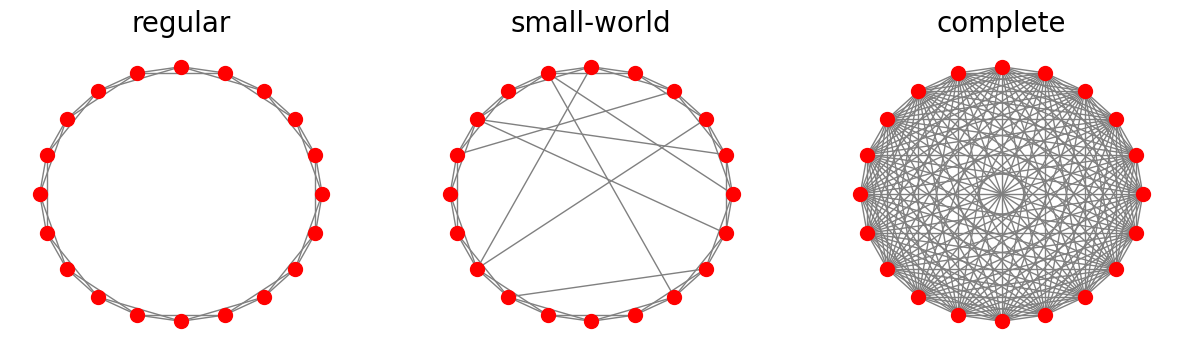

In [7]:
plt.figure(figsize=(15, 4))
# 绘制规则网络
p = 0
G1 = nx.watts_strogatz_graph(n, k, p)
plt.subplot(131)
pos1 = nx.circular_layout(G1)
nx.draw(G1, pos1, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("regular", fontsize=20)

# 绘制NW小世界
p=0.2
G2 = nx.newman_watts_strogatz_graph(n, k, p)
plt.subplot(132)
pos2 = nx.circular_layout(G2)
nx.draw(G2, pos2, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("small-world", fontsize=20)


#绘制完全网络：加边概率为1
G3 = nx.complete_graph(n)
plt.subplot(133)
pos3 = nx.circular_layout(G3)
nx.draw(G3, pos3, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("complete", fontsize=20)
plt.savefig("NW.png", dpi=600)

## 4、WS小世界网络的度分布

In [8]:
import numpy as np

In [9]:
# 定义求度分布的函数
def get_pdf(G, k):
    N = len(G.nodes())
    
    Pk = []
    for ki in k:
        c = 0
        for i in G.nodes():
            if G.degree(i) == ki:  
                c += 1     
        Pk.append(c/N)  
    
    return Pk


In [10]:
# 以N＝1000，K＝6的WS模型的数值模拟结果为例
N = 1000
K = 6
samples = 100  # 统计平均次数
p_rew = [0.1,0.2,0.4,0.6,1.0]

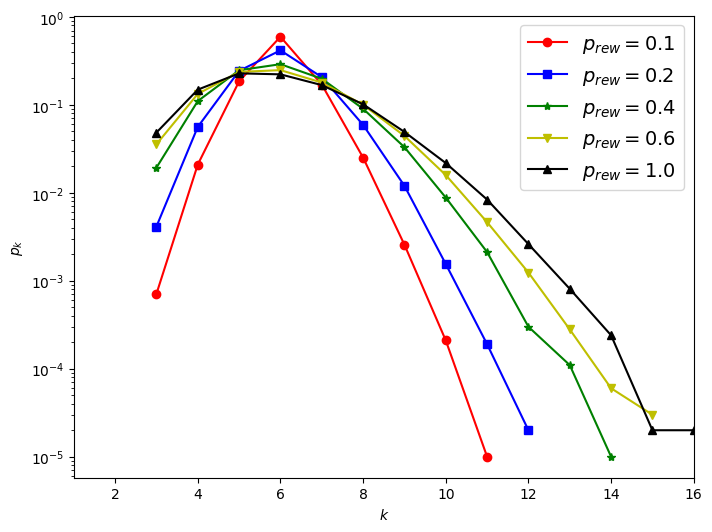

In [11]:
plt.figure(figsize=(8,6))
symbols = ["ro-","bs-","g*-","yv-","k^-"]
# 为了便于统计平均，指定区间[1,16]
kmin, kmax = 1, 16
x = list(range(kmin, kmax+1))
c = 0
for p in p_rew:
    s = np.zeros(kmax-kmin+1)
    for i in range(samples):
        G = nx.watts_strogatz_graph(N, K, p)
        y = get_pdf(G, x)
        s += np.array(y)

    
    s = list(s)
    # 剔除概率为零的点：这里也可以用numpy的函数直接剔除更方便一些
    new_x = []
    new_y = []
    for i in range(len(x)):
        if s[i] != 0:
            new_x.append(x[i])
            new_y.append(s[i])
            
    plt.plot(new_x, np.array(new_y)/samples, symbols[c], label='$p_{rew} = $'+str(p))
    c += 1

plt.legend(loc=0, fontsize=14)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.yscale("log")
plt.xlim([kmin, kmax])
plt.savefig("pdf_WS.png", dpi=600)

## 5、NW小世界网络的度分布（略，可以自己尝试一下）